In [1]:
!pip install matplotlib
!pip install numpy
!pip install notebook
!pip install tensorflow-addons
!pip install tensorflow-model-optimization
!pip install tensorflow==2.15.0
!pip install keras



In [2]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 
from IPython.display import HTML

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=5

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "skin disease genetic",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3104 files belonging to 20 classes.


In [7]:
class_names = dataset.class_names
class_names

['Acne',
 'Actinic Carcinoma',
 'Atopic Dermatitis',
 'Benign Tumors',
 'Bullous Disease',
 'Cellulitis',
 'Drug Eruptions',
 'Eczema Dermatitis',
 'Herpes Simplex Virus',
 'Light Diseases Photosensitivity',
 'Lupus',
 'Melanoma',
 'Poison Ivy',
 'Psoriasis',
 'Ringworm Despite',
 'Systemic Disease',
 'Urticarial Hives',
 'Vascular Tumors',
 'Vasculitis',
 'Viral Infections']

In [8]:
import tensorflow as tf

# Define the size of the images
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Define the class descriptions
class_descriptions = {
    'Acne': 'It is characterized by pimples, blackheads, and whiteheads, often on the face, chest, or back. It is common in adolescence and may involve inflammation.',
    'Actinic Carcinoma': 'It is a type of skin cancer that typically appears as a red or flesh-colored bump, often with a scaly or crusty surface. It is commonly found on sun-exposed areas.',
    'Atopic Dermatitis Eczema': 'It often presents as itchy, red, and inflamed skin, commonly in flexural areas like elbows and knees.',
    'Benign Tumors': 'Typically non-cancerous growths. They may appear as lumps or bumps on the skin like lipomas or seborrheic keratoses.',
    'Bullous Disease': 'Characterized by large, fluid-filled blisters on the skin. Different types may have varying causes and locations. It is also genomic in nature.',
    'Cellulitis': 'Typically a bacterial skin infection causing redness, swelling, and tenderness. It often spreads rapidly.',
    'Drug Eruptions': 'Varied reactions to medications manifesting as rashes, redness, or blistering. Can range from mild to severe.',
    'Eczema Dermatitis': 'Inflamed, itchy skin with redness, often accompanied by dryness and scaling. It is also genomic in nature.',
    'Herpes Simplex Virus': 'Causes painful fluid-filled blisters. HSV-1 often presents around the mouth while HSV-2 affects genital areas.',
    'Light Diseases Photosensitivity': 'Skin reactions triggered by sunlight, ranging from mild redness to more severe conditions.',
    'Lupus': 'An autoimmune disease that can affect the skin, causing a characteristic butterfly-shaped rash on the face and other skin issues.',
    'Melanoma': 'A type of skin cancer often presenting as an irregularly shaped, dark-colored mole or lesion.',
    'Poison Ivy': 'Characterized by red, itchy, blistering skin after contact with the poison ivy plant. The rash often has a linear pattern.',
    'Psoriasis': 'Presents as red, thickened, scaly patches on the skin. Commonly found on elbows, knees, and scalp. It is also genomic in nature.',
    'Ringworm': 'A fungal infection causing red, ring-shaped rashes on the skin. It is not caused by a worm.',
    'Systemic Disease': 'Skin manifestations can vary, but conditions like lupus or scleroderma may cause distinctive rashes associated with internal organ involvement.',
    'Urticarial Hives': 'Raised, itchy welts on the skin that can vary in size and shape. They often appear and disappear quickly.',
    'Vascular Tumors': 'Abnormal growths involving blood vessels. They may present as red or purple lumps or nodules.',
    'Vasculitis': 'Inflammation of blood vessels, leading to various skin symptoms like purpura, petechiae, or ulcers.',
    'Viral Infections': 'Different viruses can cause distinct skin issues. For example, chickenpox presents as itchy blisters, while measles may cause a red, blotchy rash.'
}

# Create a class representing each skin condition
class SkinCondition:
    def __init__(self, name, description):
        self.name = name
        self.description = description

# Create instances of SkinCondition class for each skin condition
skin_conditions = [SkinCondition(name, description) for name, description in class_descriptions.items()]

# Now you can use skin_conditions list to access information about each skin condition
# For example, to print the name and description of each skin condition:
for skin_condition in skin_conditions:
    print(f"Skin Condition: {skin_condition.name}")
    print(f"Description: {skin_condition.description}")
    print()


Skin Condition: Acne
Description: It is characterized by pimples, blackheads, and whiteheads, often on the face, chest, or back. It is common in adolescence and may involve inflammation.

Skin Condition: Actinic Carcinoma
Description: It is a type of skin cancer that typically appears as a red or flesh-colored bump, often with a scaly or crusty surface. It is commonly found on sun-exposed areas.

Skin Condition: Atopic Dermatitis Eczema
Description: It often presents as itchy, red, and inflamed skin, commonly in flexural areas like elbows and knees.

Skin Condition: Benign Tumors
Description: Typically non-cancerous growths. They may appear as lumps or bumps on the skin like lipomas or seborrheic keratoses.

Skin Condition: Bullous Disease
Description: Characterized by large, fluid-filled blisters on the skin. Different types may have varying causes and locations. It is also genomic in nature.

Skin Condition: Cellulitis
Description: Typically a bacterial skin infection causing redness

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[19  5  2  0 14  0 19 14  0 16  9 19 14 17 11  0  0  0  0  0  9  1 15  2
  9  0  1 19  9  0  8  2]


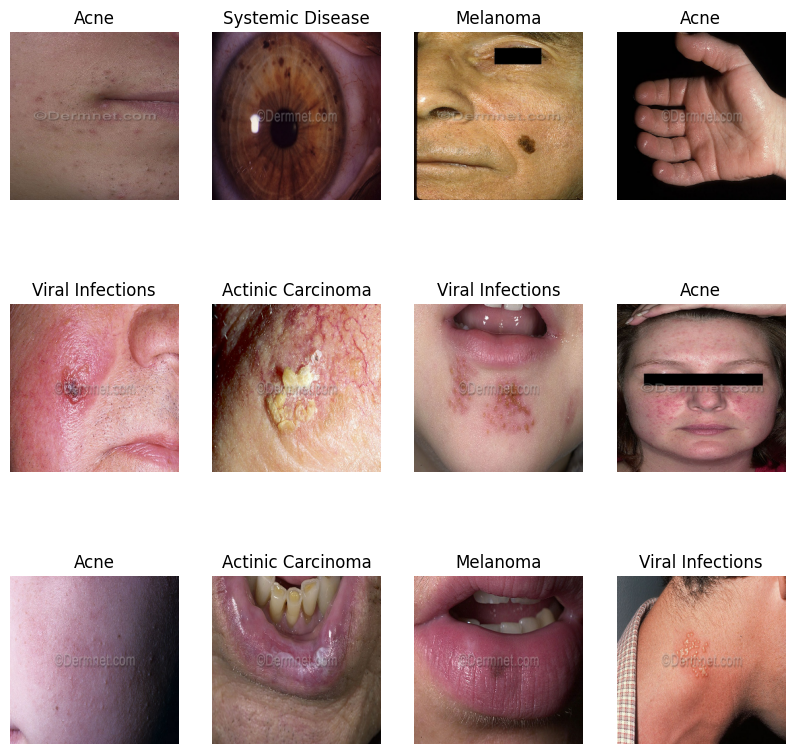

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

97

In [12]:
train_size = 0.8
len(dataset)*train_size

77.60000000000001

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

43

In [15]:
val_size=0.1
len(dataset)*val_size

9.700000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

37

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

77

In [21]:
len(val_ds)

9

In [22]:
len(test_ds)

11

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [25]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 20

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 52, 52, 64)         

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5


 3/77 [>.............................] - ETA: 2:20 - loss: 2.9829 - accuracy: 0.0417 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

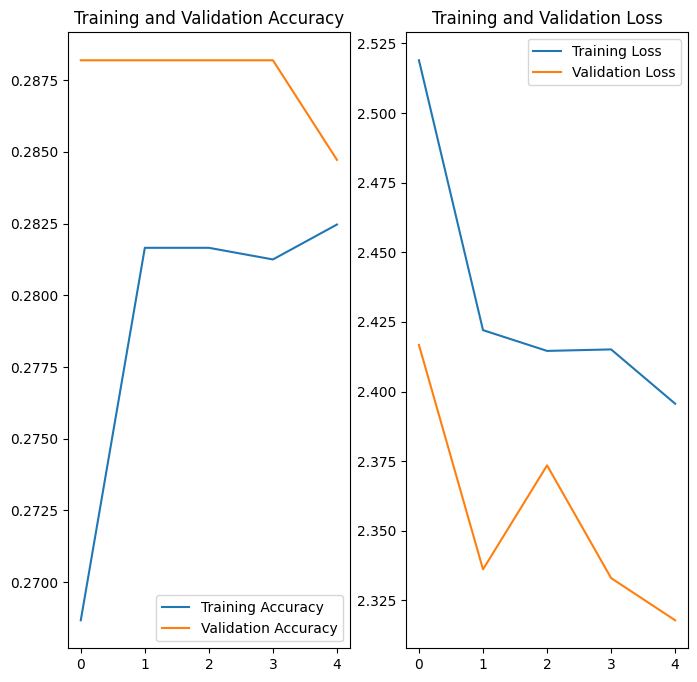

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict


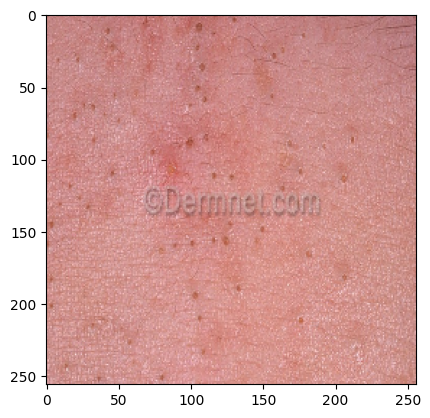

1/1 [==============================] - 3s 3s/step
Predicted label: Acne
Predicted description: It is characterized by pimples, blackheads, and whiteheads, often on the face, chest, or back. It is common in adolescence and may involve inflammation.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
class_descriptions = {
    'Acne': 'It is characterized by pimples, blackheads, and whiteheads, often on the face, chest, or back. It is common in adolescence and may involve inflammation.',
    'Actinic Carcinoma': 'It is a type of skin cancer that typically appears as a red or flesh-colored bump, often with a scaly or crusty surface. It is commonly found on sun-exposed areas.',
    'Atopic Dermatitis Eczema': 'It often presents as itchy, red, and inflamed skin, commonly in flexural areas like elbows and knees.',
    'Benign Tumors': 'Typically non-cancerous growths. They may appear as lumps or bumps on the skin like lipomas or seborrheic keratoses.',
    'Bullous Disease': 'Characterized by large, fluid-filled blisters on the skin. Different types may have varying causes and locations. It is also genomic in nature.',
    'Cellulitis': 'Typically a bacterial skin infection causing redness, swelling, and tenderness. It often spreads rapidly.',
    'Drug Eruptions': 'Varied reactions to medications manifesting as rashes, redness, or blistering. Can range from mild to severe.',
    'Eczema Dermatitis': 'Inflamed, itchy skin with redness, often accompanied by dryness and scaling. It is also genomic in nature.',
    'Herpes Simplex Virus': 'Causes painful fluid-filled blisters. HSV-1 often presents around the mouth while HSV-2 affects genital areas.',
    'Light Diseases Photosensitivity': 'Skin reactions triggered by sunlight, ranging from mild redness to more severe conditions.',
    'Lupus': 'An autoimmune disease that can affect the skin, causing a characteristic butterfly-shaped rash on the face and other skin issues.',
    'Melanoma': 'A type of skin cancer often presenting as an irregularly shaped, dark-colored mole or lesion.',
    'Poison Ivy': 'Characterized by red, itchy, blistering skin after contact with the poison ivy plant. The rash often has a linear pattern.',
    'Psoriasis': 'Presents as red, thickened, scaly patches on the skin. Commonly found on elbows, knees, and scalp. It is also genomic in nature.',
    'Ringworm': 'A fungal infection causing red, ring-shaped rashes on the skin. It is not caused by a worm.',
    'Systemic Disease': 'Skin manifestations can vary, but conditions like lupus or scleroderma may cause distinctive rashes associated with internal organ involvement.',
    'Urticarial Hives': 'Raised, itchy welts on the skin that can vary in size and shape. They often appear and disappear quickly.',
    'Vascular Tumors': 'Abnormal growths involving blood vessels. They may present as red or purple lumps or nodules.',
    'Vasculitis': 'Inflammation of blood vessels, leading to various skin symptoms like purpura, petechiae, or ulcers.',
    'Viral Infections': 'Different viruses can cause distinct skin issues. For example, chickenpox presents as itchy blisters, while measles may cause a red, blotchy rash.'
}

class SkinCondition:
    def __init__(self, name, description):
        self.name = name
        self.description = description

# Create instances of SkinCondition class for each skin condition
skin_conditions = [SkinCondition(name, description) for name, description in class_descriptions.items()]

# Example code for result generation
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    
    actual_label = class_names[first_label]
    
    batch_prediction = model.predict(images_batch)
    predicted_label_index = np.argmax(batch_prediction[0])
    predicted_label = class_names[predicted_label_index]
    predicted_description = class_descriptions[predicted_label]  # Fetching description based on predicted label
    
    print("Predicted label:", predicted_label)
    print("Predicted description:", predicted_description)


first image to predict
actual label: Atopic Dermatitis
1/1 [==============================] - 0s 373ms/step
predicted label: Acne


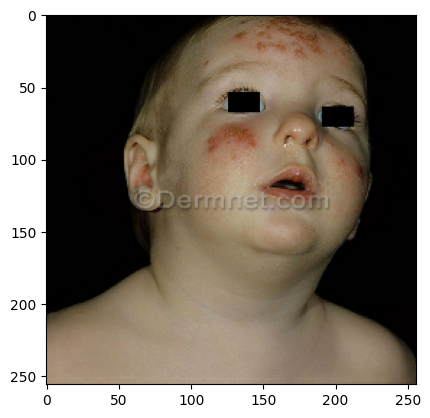

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 1, i + 1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        
        batch_prediction = model.predict(images_batch)
        predicted_label_index = np.argmax(batch_prediction[i])
        predicted_label = class_names[predicted_label_index]
        predicted_description = class_descriptions[predicted_label]
        
        actual_label = class_names[labels_batch[i].numpy()] 
        
        plt.title(f"Actual: {actual_label},\n Predicted: {predicted_label}.\n Description: {predicted_description}")
        plt.axis("off")
plt.show()

In [ ]:
model.save("../genmodel.h5")

c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
